In [68]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [69]:
# NetCDFファイルのパスを指定
file_path = 'StorGL20213hour.nc'

# データを読み込む
ds = xr.open_dataset(file_path)

# データセットの内容を確認
print(ds)

<xarray.Dataset> Size: 232kB
Dimensions:     (valid_time: 744, latitude: 3, longitude: 3)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 6kB 2021-03-01 ... 2021-03-31T23:...
  * latitude    (latitude) float64 24B 44.5 44.25 44.0
  * longitude   (longitude) float64 24B 144.0 144.2 144.5
    expver      (valid_time) <U4 12kB ...
Data variables:
    u10         (valid_time, latitude, longitude) float32 27kB ...
    v10         (valid_time, latitude, longitude) float32 27kB ...
    d2m         (valid_time, latitude, longitude) float32 27kB ...
    t2m         (valid_time, latitude, longitude) float32 27kB ...
    sp          (valid_time, latitude, longitude) float32 27kB ...
    tp          (valid_time, latitude, longitude) float32 27kB ...
    ssrd        (valid_time, latitude, longitude) float32 27kB ...
    strd        (valid_time, latitude, longitude) float32 27kB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  Europ

In [70]:
ssrd = ds['ssrd']

In [71]:
ar_time = np.array(ssrd.valid_time)

In [72]:
ar_ssrd = np.array(ssrd.sel(latitude=44.25, longitude=144.2, method='nearest'))

In [91]:
# NetCDFファイルのパスを指定
file_path = 'StorGL202312hour.nc'

# データを読み込む
ds = xr.open_dataset(file_path)
ssrd = ds['ssrd']
ar_time = np.array(ssrd.valid_time)
ar_ssrd = np.array(ssrd.sel(latitude=44.25, longitude=144.2, method='nearest'))
ar_output = np.zeros([ar_time.shape[0], 2])
ar_output[:,0],ar_output[:,1] = ar_time, ar_ssrd
df_output = pd.DataFrame([ar_time,ar_ssrd]).T
df_output.to_csv("abashiri_202312.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/media/ussy/SSD_256GB/dev/radiation/code/era5/StorGL202312hour.nc'

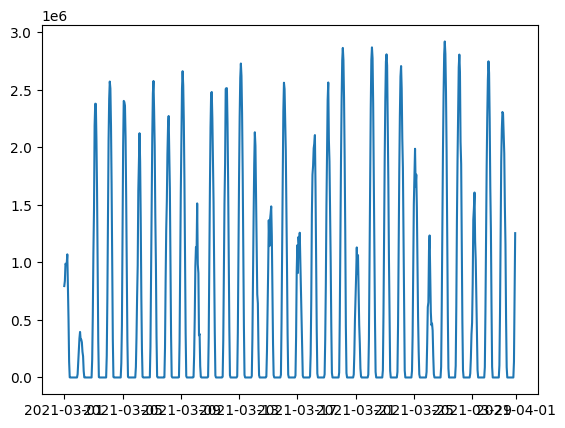

In [73]:
plt.plot(ar_time, ar_ssrd)

In [74]:
df = pd.read_csv("../final_radiation_data_DR.csv", parse_dates=[0])
# df[df['Datetime'] > datetime.datetime(2021,3,1,0,0,0)]
df_cut = df[(df['Datetime'] > datetime.datetime(2021,3,1,0,0,0)) & (df['Datetime'] < datetime.datetime(2021,3,31,23,0,0))]

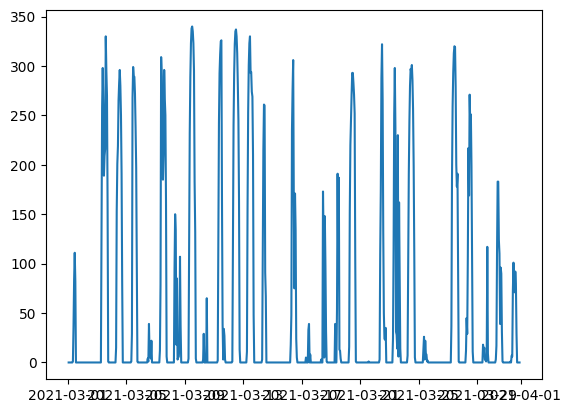

In [75]:
plt.plot(df_cut['Datetime'],df_cut['Radiation'])

In [76]:
type(df.iloc[0,0])

pandas._libs.tslibs.timestamps.Timestamp

In [77]:
df

,Datetime,Radiation
0,2021-03-01 01:00:00,0
1,2021-03-01 02:00:00,0
2,2021-03-01 03:00:00,0
3,2021-03-01 04:00:00,0
4,2021-03-01 05:00:00,0
...,...,...
31435,2024-09-30 20:00:00,0
31436,2024-09-30 21:00:00,0
31437,2024-09-30 22:00:00,0
31438,2024-09-30 23:00:00,0
